# 1. Importar librerias

In [2]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

#Importar módulo de funciones
import sys
sys.path.insert(0, 'utils')  # Añadir el directorio 'utils' al PATH
import funciones
from importlib import reload
reload(funciones)  # Recarga el módulo

<module 'funciones' from 'c:\\recursos_humanos\\utils\\funciones.py'>

# 2. Obtener datos

#### Importar datos

In [3]:
data = pd.read_csv('data/seleccion_gb.csv')

#### Separar variable objetivo y hacer el split

In [4]:
X = data.drop('target', axis = 1)
y = data.target

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Busqueda de hiperparametros

## 3.1 Decision Tree Classifier

#### Definir grilla

In [5]:
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30],
              'max_leaf_nodes': [80,90,100,110,120,130,140,200,210,220,230,240,250],
              'min_samples_leaf': [2,3,5,7,9,11,13,15,17,19,21,23],
              'class_weight': [None,'balanced']}

#### Realizar busqueda

In [6]:
dt = DecisionTreeClassifier(random_state = 42)
rand_s = GridSearchCV(estimator = dt,
                            param_grid = parameters,
                            n_jobs = -1,
                            scoring = 'recall',
                            cv=5,
                            verbose = True)
rand_s.fit(X_train, y_train)

Fitting 5 folds for each of 5304 candidates, totalling 26520 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 20, 25, 30],
                         'max_leaf_nodes': [80, 90, 100, 110, 120, 130, 140,
                                            200, 210, 220, 230, 240, 250],
                         'min_samples_leaf': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23]},
             scoring='recall', verbose=True)

#### Modelo con mejores hiperparametros

In [7]:
rand_s.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_leaf_nodes=140, min_samples_leaf=5, random_state=42)

In [8]:
dt_final = rand_s.best_estimator_

#### Evaluación

------------------------------ TRAIN ------------------------------


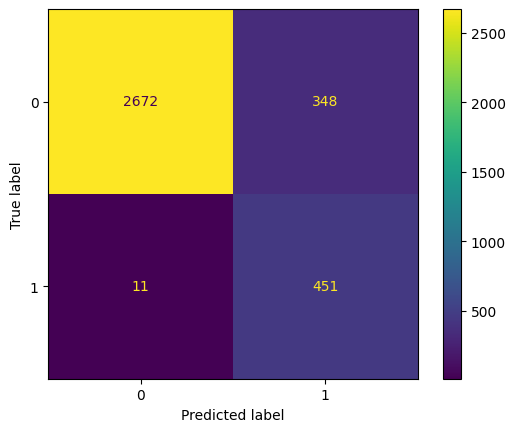

Precision: 0.5644555694618273
Recall: 0.9761904761904762
Especificidad: 0.8847682119205298
F1 score: 0.7153053132434575
Train score:  0.8968983342906376
------------------------------ TEST ------------------------------


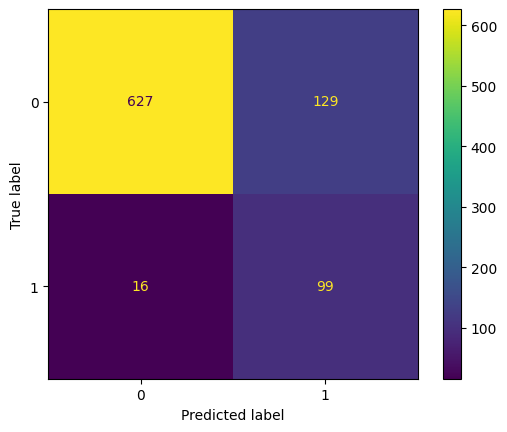

Precision: 0.4342105263157895
Recall: 0.8608695652173913
Especificidad: 0.8293650793650794
F1 score: 0.5772594752186588
Train score:  0.8335246842709529


In [9]:
res_train = funciones.metricas(dt_final,X_train,y_train,'TRAIN')
res_test = funciones.metricas(dt_final,X_test,y_test,'TEST')